In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [8]:
class Histogram:
    
    def __init__(self, img):
        self.img = img
    
    def originalHistogram(self): 
        plt.hist(self.img.ravel(),256,[0,256])
        plt.show()
        
    def equalizationHistogram(self):
        equ = cv.equalizeHist(img)
        res = np.hstack((img,equ))
        cv.imshow('Equalization Histogram',res)
        plt.hist(equ.ravel(),256,[0,256])
        plt.show()
        cv.waitKey(0)
        cv.destroyAllWindows()
        
    def histogramMatching(img,reference):
        img_shape = img.shape
    
        img = img.ravel()
        reference = reference.ravel()

        o_values, bin_idx, o_counts = np.unique(img, return_inverse=True,return_counts=True)
        b_values, b_counts = np.unique(reference, return_counts=True)

        o_quantiles = np.cumsum(o_counts).astype(np.float64)
        o_quantiles /= o_quantiles[-1]
        b_quantiles = np.cumsum(b_counts).astype(np.float64)
        b_quantiles /= b_quantiles[-1]

        interp_t_values = np.interp(o_quantiles, b_quantiles, b_values)

        return interp_t_values[bin_idx].reshape(img_shape)

In [9]:
selectImg = input("Please select photo : ")
img = cv.imread(selectImg,0)
fn = Histogram(img)

Please select photo : katekuray.jpg


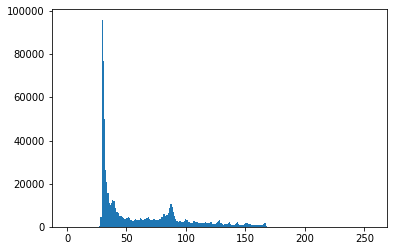

In [10]:
fn.originalHistogram()

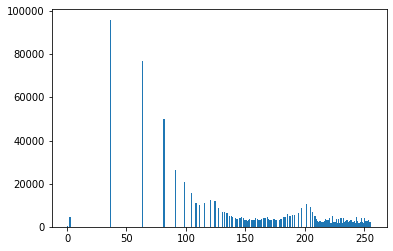

In [ ]:
fn.equalizationHistogram()

In [ ]:
img1 = cv.imread('img.jpg')
reference =  cv.imread('reference.jpg')

In [ ]:
fn.histogramMatching(img1,reference)